In [1]:
import os, sys
os.chdir(os.path.abspath('..'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
%load_ext autoreload
%autoreload 2

from src.preprocess_lib import *
from src.user_encoding_lib import *
from src.utils import *

In [4]:
dataset_dir = "/home/kbolat/Python/behavio-temporal-vae/data"
dataset_name = "goi4_dp_full_Gipuzkoa/"

In [377]:
X, _ = get_full_data(dataset_dir, dataset_name, subsample_rate_user=5)
X = X.astype(np.float32)
num_users, num_days, num_features = X.shape

Dataset: goi4_dp_full_Gipuzkoa/
Loaded 2522880 consumption profiles from 365 dates and 6912 users.
Removing 15 users with all-zero consumption profiles
Removing 67 users with any-negative consumption profiles


In [378]:
X_nrm = X.reshape(num_users, -1)
X_nrm /= X_nrm.mean(axis=1, keepdims=True)
X_nrm = X_nrm.reshape(num_users, num_days, num_features)

nonzero_mean, nonzero_std = zero_preserved_log_stats(X_nrm.reshape(-1, num_features))
X_zpln = zero_preserved_log_normalize(X_nrm, nonzero_mean, nonzero_std, log_output=True) 


In [379]:
num_temporal_topics = 5
num_temporal_clusters = 500
RANDOM_SEED = 2112

In [380]:
dayEncoder = UserEncoder(num_topics=num_temporal_topics, num_clusters=num_temporal_clusters, random_state=RANDOM_SEED)

In [381]:
fit_kwargs = {"lda": 
                    {"perp_tol": 0.5,
                    "max_iter": 100,
                    "batch_size": 64,
                    "verbose": True,
                    "learning_method": "online",
                    "evaluate_every": 5,
                    "n_jobs": None,
                    "doc_topic_prior": 1/num_temporal_topics,
                    "topic_word_prior": 1/num_temporal_clusters,}
              }

In [382]:
dayEncoder.fit(X_nrm.transpose(1, 0, 2), fit_kwargs)
day_gamma = dayEncoder.transform(X_zpln.transpose(1, 0, 2))

Clustering...
Fitting LDA...
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 340.8485
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 340.2109
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 339.9648


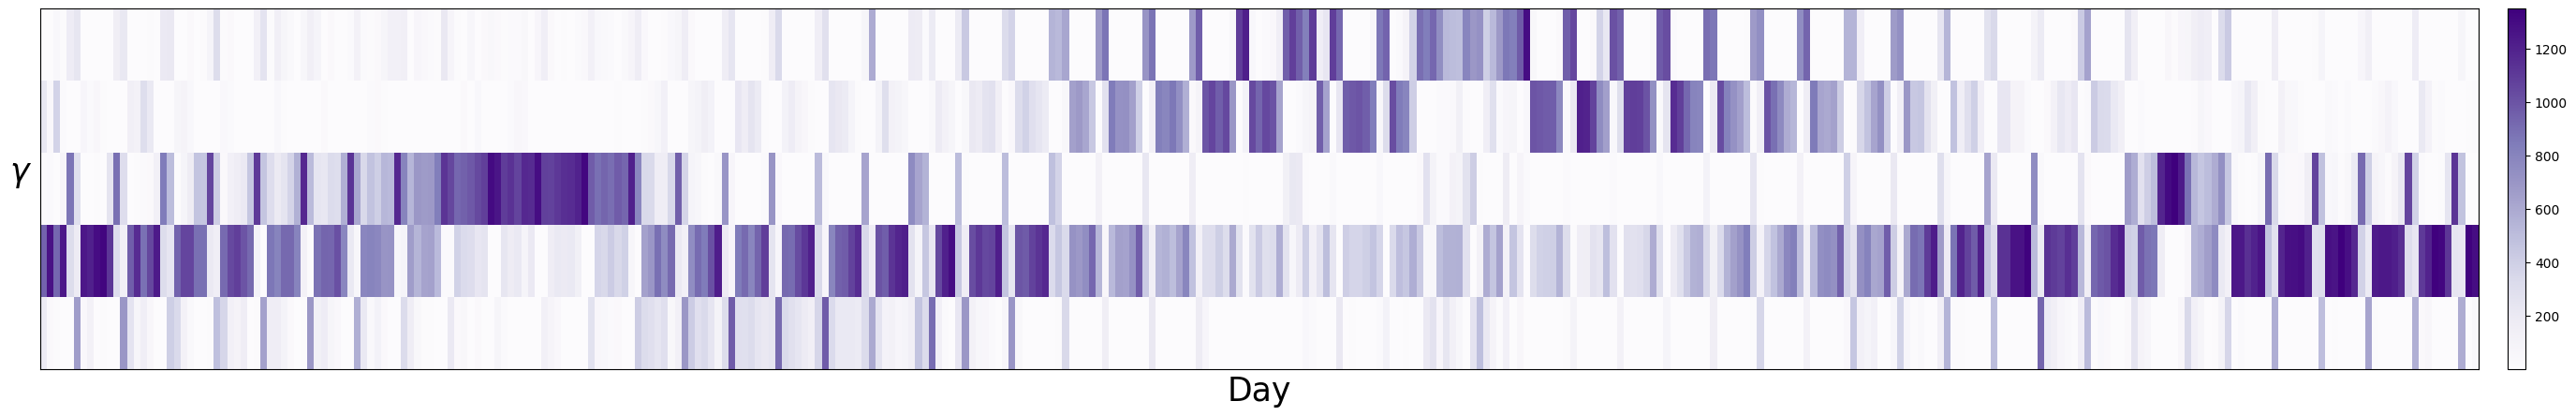

In [383]:
fig, ax = plt.subplots(figsize=(40, 5))
plt.pcolormesh(day_gamma.T, cmap='Purples')
ax.set_xlabel("Day", size=25)
ax.set_ylabel(r"$\gamma$", size=25, rotation=0, labelpad=15)
plt.xticks([])
plt.yticks([])
plt.colorbar(pad=0.01)

plt.show()

In [384]:
day_theta_mean = day_gamma/np.sum(day_gamma, axis=1, keepdims=True)

In [385]:
X_zpln_aug = np.concatenate([X_zpln, np.tile(day_theta_mean, (num_users, 1, 1))], axis=2)

In [386]:
num_behavorial_topics = 20
num_behavorial_clusters = 2500

In [387]:
userEncoder_base = UserEncoder(num_topics=num_behavorial_topics, num_clusters=num_behavorial_clusters, random_state=RANDOM_SEED)
userEncoder_aug  = UserEncoder(num_topics=num_behavorial_topics, num_clusters=num_behavorial_clusters, random_state=RANDOM_SEED)

In [388]:
userEncoder_base.fit(X_zpln, fit_kwargs)
user_gamma_base = userEncoder_base.transform(X_zpln)

Clustering...
Fitting LDA...
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 633.5901
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 605.6497
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 597.9904
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 593.9949
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 591.7621
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
it

In [389]:
userEncoder_aug.fit(X_zpln_aug, fit_kwargs)
user_gamma_aug = userEncoder_aug.transform(X_zpln_aug)

Clustering...
Fitting LDA...
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 614.7428
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 587.5073
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 580.5908
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 577.3837
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 575.4841
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
it

In [390]:
ssample = 1## for visualization

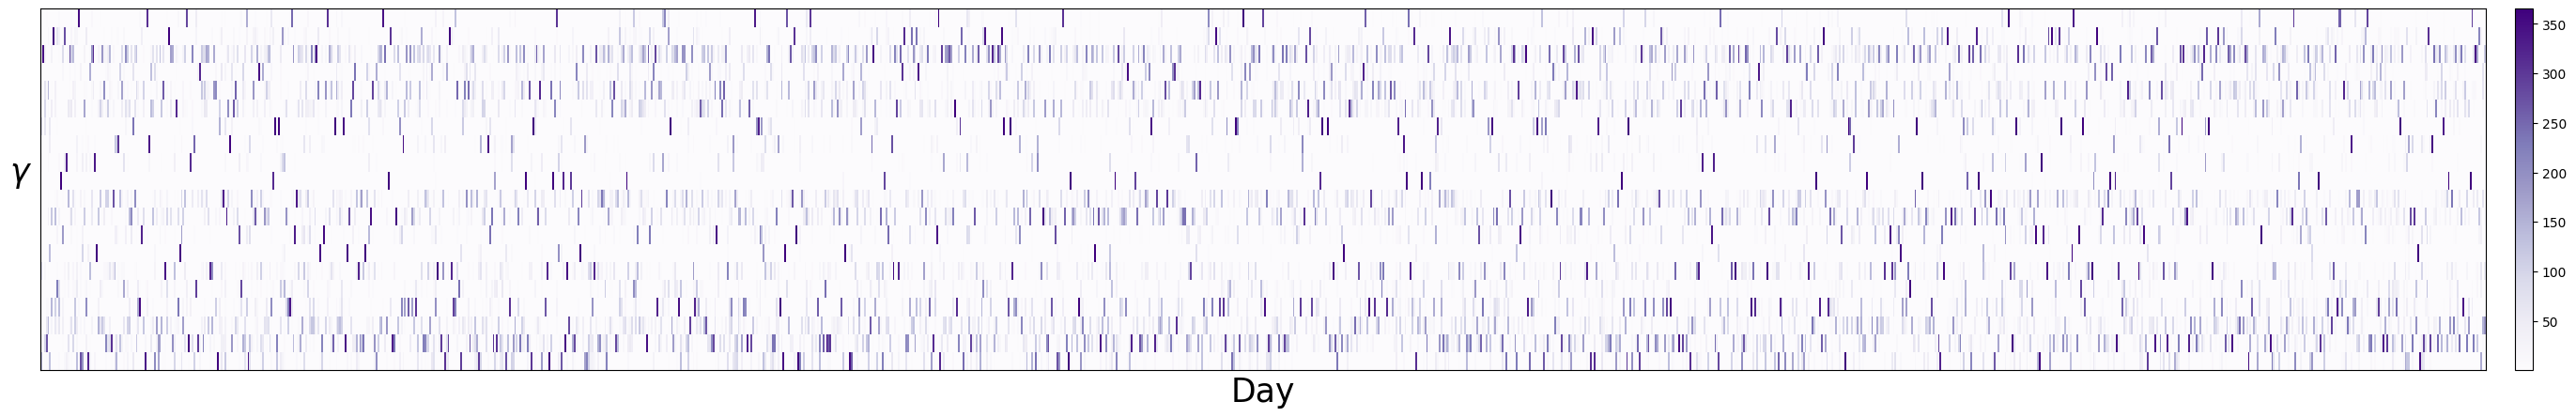

In [391]:
fig, ax = plt.subplots(figsize=(40, 5))
plt.pcolormesh(user_gamma_base[9::ssample].T, cmap='Purples')
ax.set_xlabel("Day", size=25)
ax.set_ylabel(r"$\gamma$", size=25, rotation=0, labelpad=15)
plt.xticks([])
plt.yticks([])
plt.colorbar(pad=0.01)

plt.show()

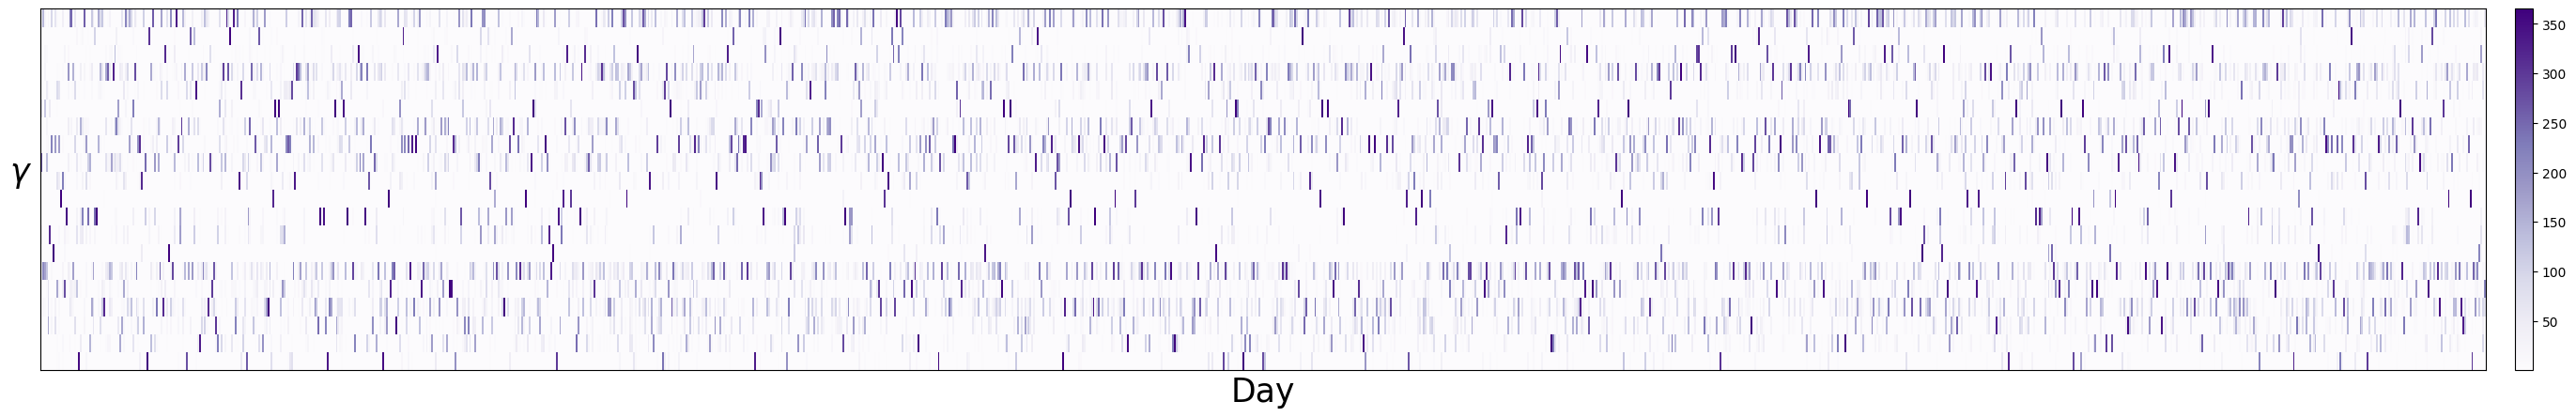

In [392]:
fig, ax = plt.subplots(figsize=(40, 5))
plt.pcolormesh(user_gamma_aug[9::ssample].T, cmap='Purples')
ax.set_xlabel("Day", size=25)
ax.set_ylabel(r"$\gamma$", size=25, rotation=0, labelpad=15)
plt.xticks([])
plt.yticks([])
plt.colorbar(pad=0.01)

plt.show()

In [393]:
def kl_div_dirichlet(alpha_1, alpha_2):
    return sp.special.gammaln(np.sum(alpha_1,axis=1)) - np.sum(sp.special.gammaln(alpha_1),axis=1) - sp.special.gammaln(np.sum(alpha_2, axis=1)) + np.sum(sp.special.gammaln(alpha_2),axis=1) + np.sum((alpha_1-alpha_2)*(sp.special.digamma(alpha_1)-sp.special.digamma(np.sum(alpha_1, axis=1))[:,np.newaxis]),axis=1)

def sym_kl_div_dirichlet(alpha_1, alpha_2):
    return 0.5*(kl_div_dirichlet(alpha_1, alpha_2) + kl_div_dirichlet(alpha_2, alpha_1))

In [401]:
distances_base = sym_kl_div_dirichlet(user_gamma_base[:,:,None], user_gamma_base.T[None,:,:])
distances_aug = sym_kl_div_dirichlet(user_gamma_aug[:,:,None], user_gamma_aug.T[None,:,:])

In [414]:
from sklearn.cluster import AgglomerativeClustering, KMeans, HDBSCAN, OPTICS

clustering_base = AgglomerativeClustering(n_clusters=None, metric="precomputed", linkage="complete", compute_distances=True, distance_threshold=3900).fit(distances_base)
# clustering = HDBSCAN(min_cluster_size=5, metric="precomputed").fit(distances_base)
labels_base = clustering_base.labels_

clustering_aug = AgglomerativeClustering(n_clusters=clustering_base.n_clusters_, metric="precomputed", linkage="complete", compute_distances=True).fit(distances_aug)
# clustering = HDBSCAN(min_cluster_size=5, metric="precomputed").fit(distances_aug)
labels_aug = clustering_aug.labels_

<BarContainer object of 19 artists>

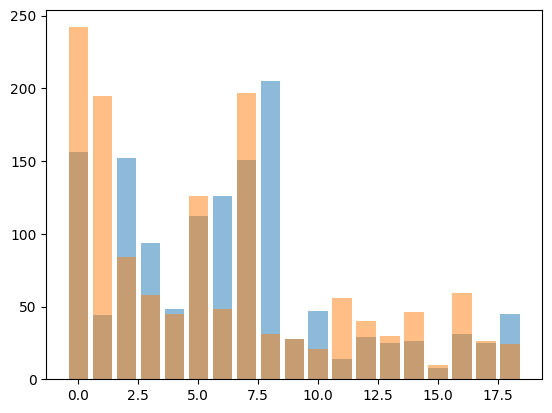

In [415]:
plt.bar(np.arange(np.max(labels_base+1)), np.bincount(labels_base[labels_base>=0]), alpha=0.5, label="Base")
plt.bar(np.arange(np.max(labels_aug+1)), np.bincount(labels_aug[labels_aug>=0]), alpha=0.5, label="Aug")

In [416]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(clustering_aug, truncate_mode="level", p=4)

ValueError: Linkage 'Z' contains negative distances.

In [417]:
user_count_threshold = 10

labels_base_filtered = labels_base.copy()
labels_aug_filtered = labels_aug.copy()

for i in np.unique(labels_base):
    if np.sum(labels_base==i) <= user_count_threshold: labels_base_filtered[labels_base==i] = -1

for i in np.unique(labels_aug):
    if np.sum(labels_aug==i) <= user_count_threshold: labels_aug_filtered[labels_aug==i] = -1

In [449]:
num_stereotypes_base = np.unique(labels_base_filtered[labels_base_filtered != -1]).shape[0]
num_stereotypes_aug = np.unique(labels_aug_filtered[labels_aug_filtered != -1]).shape[0]

print(f"Number of base stereotypes: {num_stereotypes_base}")
print(f"Number of augmented stereotypes: {num_stereotypes_aug}")

stereotypes_base = np.zeros((num_stereotypes_base, num_behavorial_topics))
for stereotype_no in range(num_stereotypes_base):
    stereotype = np.mean(user_gamma_base[labels_base==stereotype_no], axis=0)
    stereotypes_base[stereotype_no] = stereotype

stereotypes_aug = np.zeros((num_stereotypes_aug, num_behavorial_topics))
for stereotype_no in range(num_stereotypes_aug):
    stereotype = np.mean(user_gamma_aug[labels_aug==stereotype_no], axis=0)
    stereotypes_aug[stereotype_no] = stereotype

Number of base stereotypes: 18
Number of augmented stereotypes: 18


In [419]:
num_representatives = 10

representative_distances_base = sym_kl_div_dirichlet(stereotypes_base[:,:,None], user_gamma_base.T[None,:,:])
representative_users_base = np.zeros((num_stereotypes_base, num_representatives)).astype(int)
for stereotype_no in range(num_stereotypes_base):
    representative_users_base[stereotype_no] = np.argsort(representative_distances_base[stereotype_no])[0:num_representatives]

representative_distances_aug = sym_kl_div_dirichlet(stereotypes_aug[:,:,None], user_gamma_aug.T[None,:,:])
representative_users_aug = np.zeros((num_stereotypes_aug, num_representatives)).astype(int)
for stereotype_no in range(num_stereotypes_aug):
    representative_users_aug[stereotype_no] = np.argsort(representative_distances_aug[stereotype_no])[0:num_representatives]

In [453]:
X_flt = X_nrm.reshape(num_users, -1)
window_size = 8000

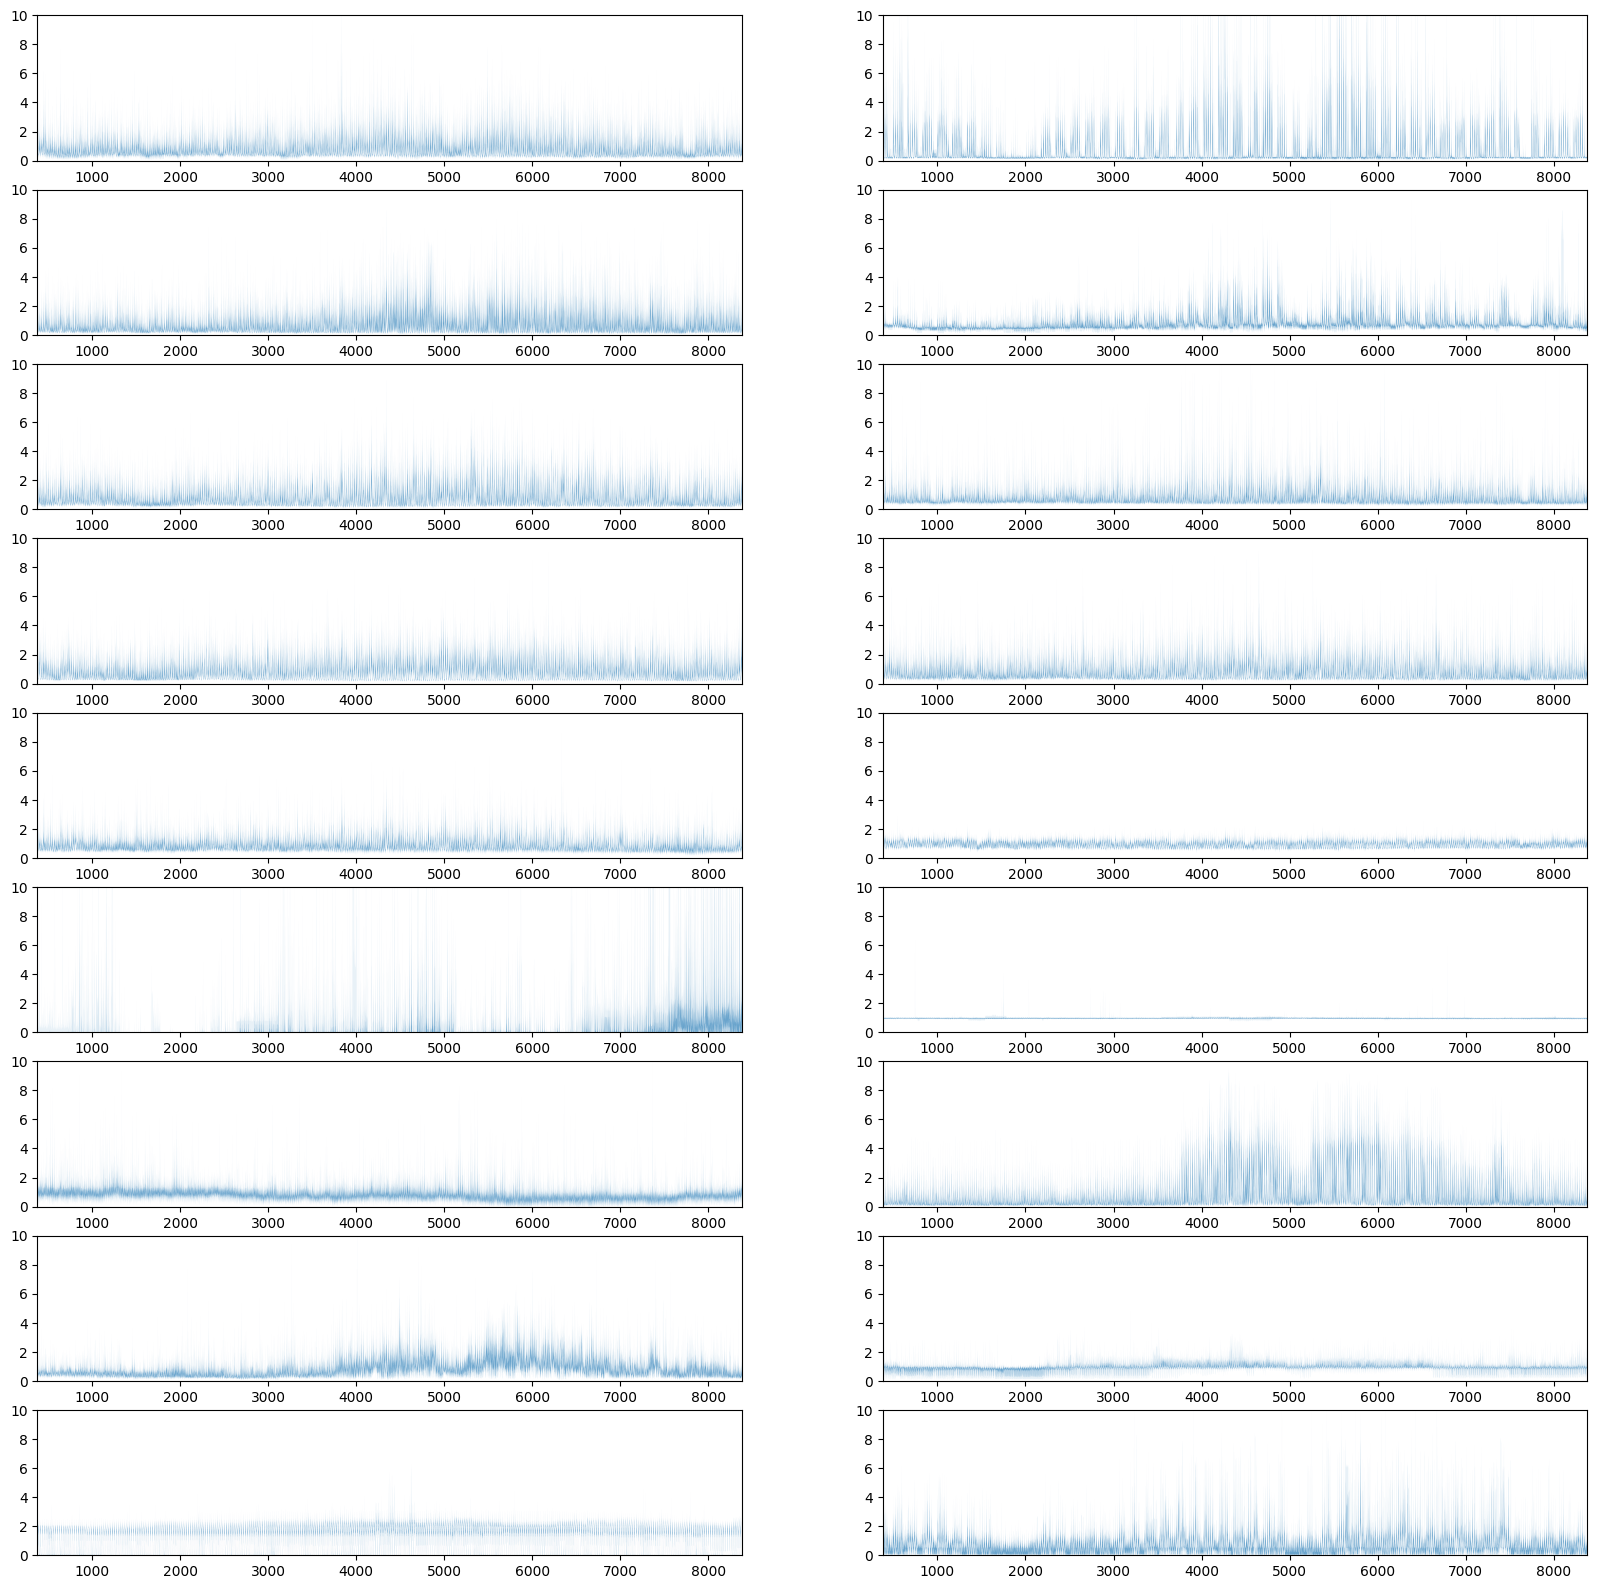

In [455]:
fig, ax = plt.subplots(num_stereotypes_base//2 + num_stereotypes_base%2, 2, figsize=(20, 20))

for stereotype_no in range(num_stereotypes_base):
    ax[stereotype_no//2, stereotype_no%2].fill_between(np.arange(X_flt.shape[1]), np.quantile(X_flt[representative_users_base[stereotype_no]], 0.1, axis=0), np.quantile(X_flt[representative_users_base[stereotype_no]], 0.9, axis=0), alpha=0.10, color="tab:blue", lw=0)
    ax[stereotype_no//2, stereotype_no%2].fill_between(np.arange(X_flt.shape[1]), np.quantile(X_flt[representative_users_base[stereotype_no]], 0.25, axis=0), np.quantile(X_flt[representative_users_base[stereotype_no]], 0.75, axis=0), alpha=0.25, color="tab:blue", lw=0)
    ax[stereotype_no//2, stereotype_no%2].fill_between(np.arange(X_flt.shape[1]), np.quantile(X_flt[representative_users_base[stereotype_no]], 0.4, axis=0), np.quantile(X_flt[representative_users_base[stereotype_no]], 0.6, axis=0), alpha=0.5, color="tab:blue", lw=0)
    # ax[stereotype_no//2, stereotype_no%2].plot(np.median(X_flt[representative_users_base[stereotype_no]], axis=0), alpha=1.0, color="k", lw=1.0)
    ax[stereotype_no//2, stereotype_no%2].set_xlim((X_flt.shape[1]-window_size)//2, (X_flt.shape[1]+window_size)//2)
    ax[stereotype_no//2, stereotype_no%2].set_ylim(0, 10)


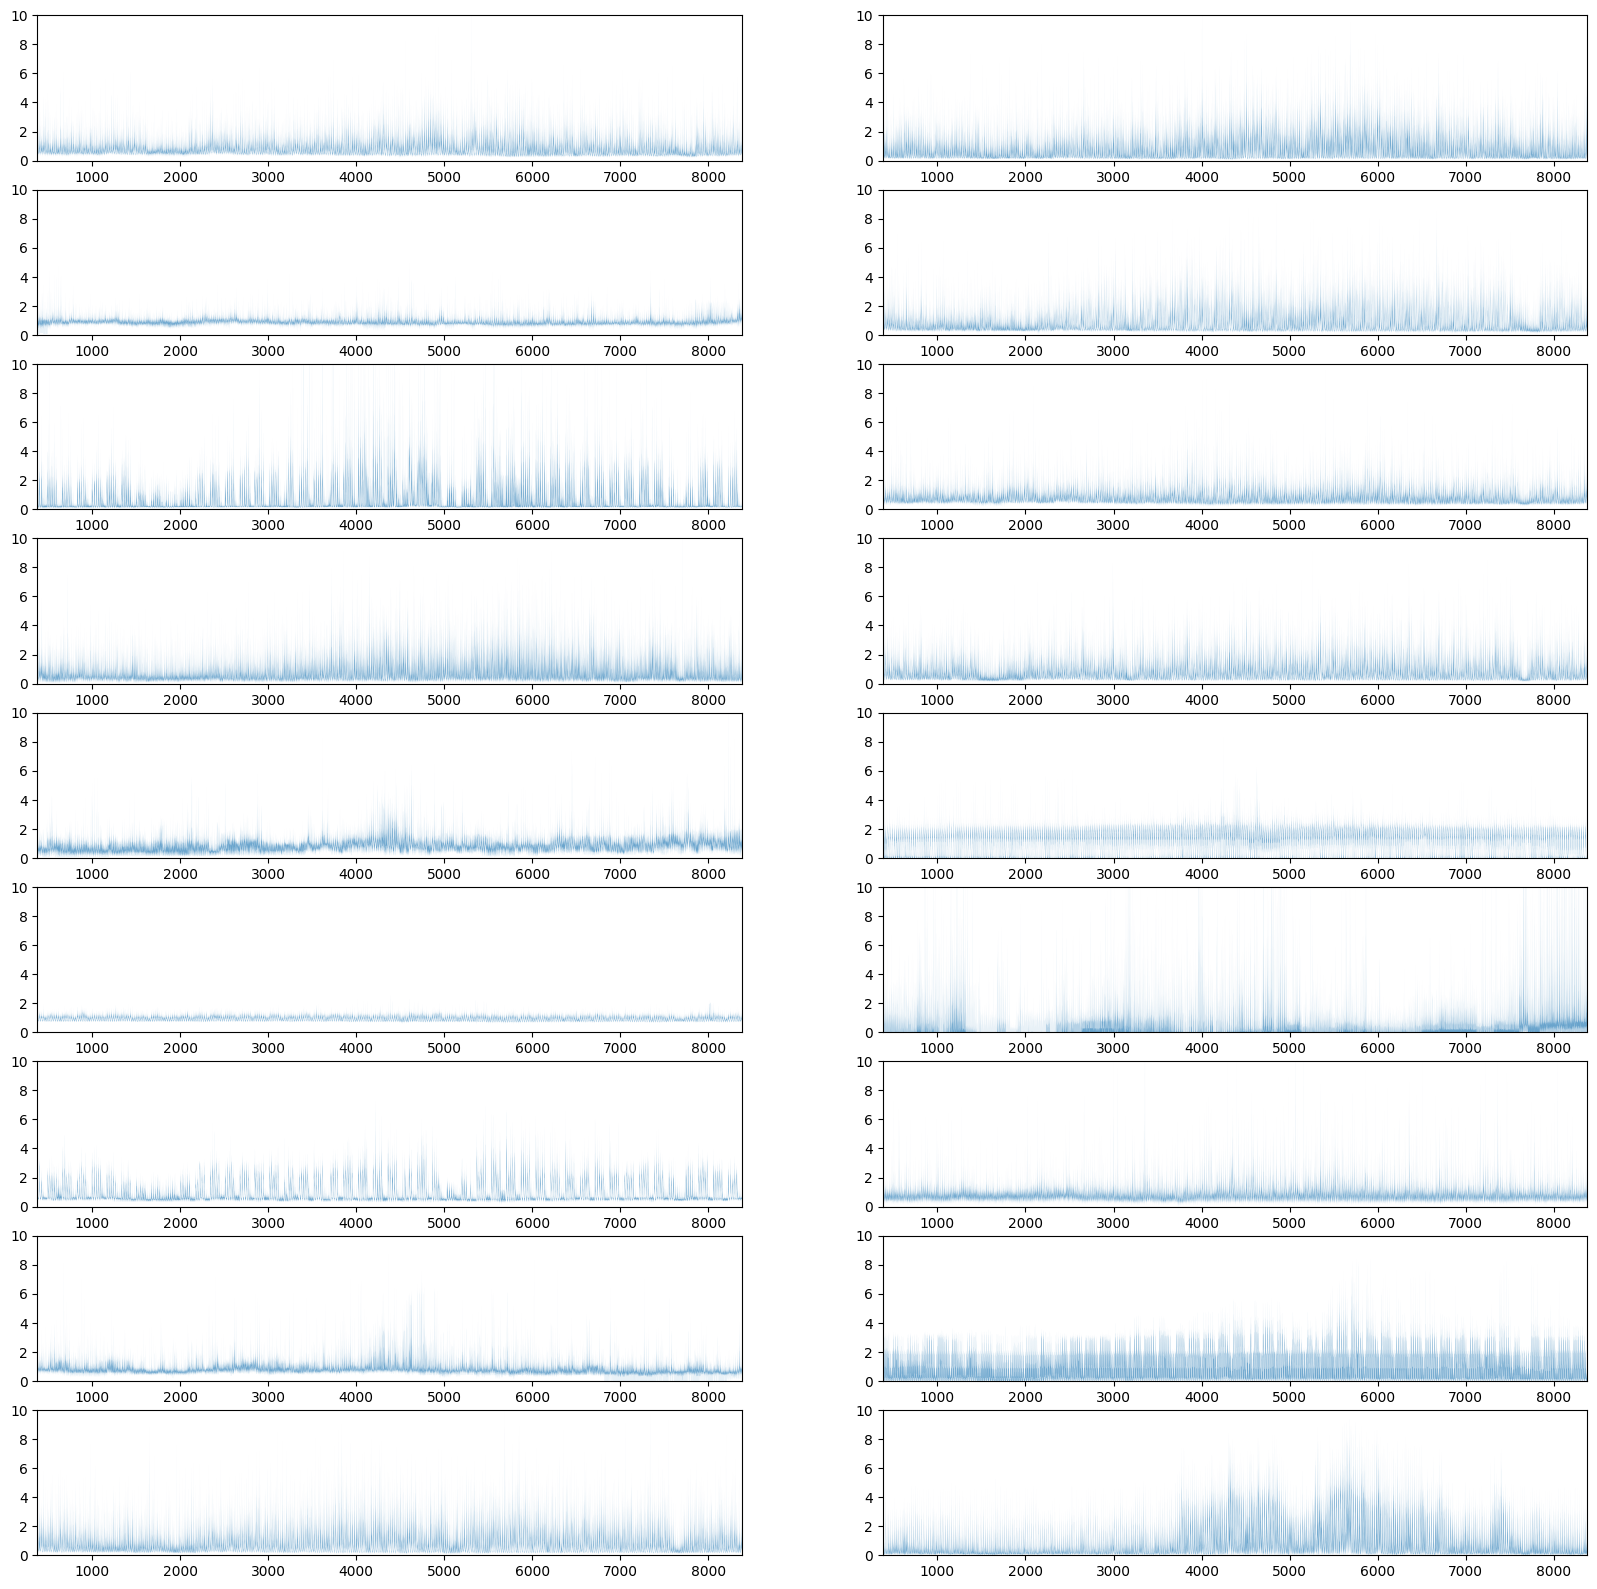

In [456]:
fig, ax = plt.subplots(num_stereotypes_aug//2 + num_stereotypes_aug%2, 2, figsize=(20, 20))

for stereotype_no in range(num_stereotypes_aug):
    ax[stereotype_no//2, stereotype_no%2].fill_between(np.arange(X_flt.shape[1]), np.quantile(X_flt[representative_users_aug[stereotype_no]], 0.1, axis=0), np.quantile(X_flt[representative_users_aug[stereotype_no]], 0.9, axis=0), alpha=0.10, color="tab:blue", lw=0)
    ax[stereotype_no//2, stereotype_no%2].fill_between(np.arange(X_flt.shape[1]), np.quantile(X_flt[representative_users_aug[stereotype_no]], 0.25, axis=0), np.quantile(X_flt[representative_users_aug[stereotype_no]], 0.75, axis=0), alpha=0.25, color="tab:blue", lw=0)
    ax[stereotype_no//2, stereotype_no%2].fill_between(np.arange(X_flt.shape[1]), np.quantile(X_flt[representative_users_aug[stereotype_no]], 0.4, axis=0), np.quantile(X_flt[representative_users_aug[stereotype_no]], 0.6, axis=0), alpha=0.5, color="tab:blue", lw=0)
    # ax[stereotype_no//2, stereotype_no%2].plot(np.median(X_flt[representative_users_aug[stereotype_no]], axis=0), alpha=1.0, color="k", lw=1.0)
    ax[stereotype_no//2, stereotype_no%2].set_xlim((X_flt.shape[1]-window_size)//2, (X_flt.shape[1]+window_size)//2)
    ax[stereotype_no//2, stereotype_no%2].set_ylim(0,10)

In [445]:
from sklearn.metrics import silhouette_score

silhouette_score(X_nrm.reshape(num_users,-1), labels_base, metric="l2")

-0.23265056

In [117]:
silhouette_score(X_nrm.reshape(num_users,-1), labels_aug, metric="correlation")

-0.05628061515984893